## Time Series Analysis: Granger Causality








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Setting Up**: Import Needed Libraries and Set DataFrame Display

In [ ]:
import io,pandas as pd,numpy as np,matplotlib.pyplot as plt, seaborn as sns
from datetime import datetime
from functools import reduce

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

%matplotlib inline


from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import adfuller

**Upload the Datasets for each News Topic**

In [ ]:
from google.colab import files

inflation = files.upload()
economy = files.upload()
politics = files.upload()
technology = files.upload()
environment = files.upload()
health = files.upload()
business = files.upload()
foreign_affairs = files.upload()
welfare = files.upload()

Saving inflation_tally.csv to inflation_tally.csv


Saving economy_tally.csv to economy_tally.csv


Saving politics_tally.csv to politics_tally.csv


Saving technology_tally.csv to technology_tally.csv


Saving environment_tally.csv to environment_tally.csv


Saving health_tally.csv to health_tally.csv


Saving business_tally.csv to business_tally.csv


Saving foreign_affairs_tally.csv to foreign_affairs_tally.csv


Saving welfare_tally.csv to welfare_tally.csv


## PreProcessing

**Convert Month Name to Corresponding Integer**<br>

**Read and Label Each News Columns to corresponding topic by adding a suffix of the topic name**<br>
ex: rappler_inflation



In [ ]:
#Step 6: Create a mapping functions to convert the month name into corresponding integer
month = {"January":1,"February":2,"March":3,"April":4}

#Step 7: Read each uploaded file into dataframes, add suffix depending on which tally, and map the months, create a new column called year, and create date stamp
df1 = pd.read_csv(io.BytesIO(inflation['inflation_tally.csv']))
df1 = df1.add_suffix('_inflation')
df1.Month_inflation = df1.Month_inflation.map(month)
df1['Year_inflation']=int('2024')
df1 = df1.dropna()
df1 = df1.astype("int64")
df1['Date'] = df1.apply(lambda row: datetime(row['Year_inflation'], row['Month_inflation'], row['Day_inflation']), axis=1)

df2 = pd.read_csv(io.BytesIO(economy['economy_tally.csv']))
df2 = df2.add_suffix('_economy')
df2.Month_economy = df2.Month_economy.map(month)
df2['Year_economy']=int('2024')
df2 = df2.dropna()
df2 = df2.astype("int64")
df2['Date'] = df2.apply(lambda row: datetime(row['Year_economy'], row['Month_economy'], row['Day_economy']), axis=1)


df3 = pd.read_csv(io.BytesIO(politics['politics_tally.csv']))
df3 = df3.add_suffix('_politics')
df3['Month_politics'] = df3['Month_politics'].map(month)
df3['Year_politics'] = int('2024')
df3 = df3.dropna()
df3 = df3.astype("int64")
df3['Date'] = df3.apply(lambda row: datetime(row['Year_politics'], row['Month_politics'], row['Day_politics']), axis=1)


df4 = pd.read_csv(io.BytesIO(technology['technology_tally.csv']))
df4 = df4.add_suffix('_technology')
df4['Month_technology'] = df4['Month_technology'].map(month)
df4['Year_technology'] = int('2024')
df4 = df4.dropna()
df4 = df4.astype("int64")
df4['Date'] = df4.apply(lambda row: datetime(row['Year_technology'], row['Month_technology'], row['Day_technology']), axis=1)


df5 = pd.read_csv(io.BytesIO(environment['environment_tally.csv']))
df5 = df5.add_suffix('_environment')
df5['Month_environment'] = df5['Month_environment'].map(month)
df5['Year_environment'] = int('2024')
df5 = df5.dropna()
df5 = df5.astype("int64")
df5['Date'] = df5.apply(lambda row: datetime(row['Year_environment'], row['Month_environment'], row['Day_environment']), axis=1)


df6 = pd.read_csv(io.BytesIO(health['health_tally.csv']))
df6 = df6.add_suffix('_health')
df6['Month_health'] = df6['Month_health'].map(month)
df6['Year_health'] = int('2024')
df6 = df6.dropna()
df6 = df6.astype("int64")
df6['Date'] = df6.apply(lambda row: datetime(row['Year_health'], row['Month_health'], row['Day_health']), axis=1)


df7 = pd.read_csv(io.BytesIO(business['business_tally.csv']))
df7 = df7.add_suffix('_business')
df7['Month_business'] = df7['Month_business'].map(month)
df7['Year_business'] = int('2024')
df7 = df7.dropna()
df7 = df7.astype("int64")
df7['Date'] = df7.apply(lambda row: datetime(row['Year_business'], row['Month_business'], row['Day_business']), axis=1)


df8 = pd.read_csv(io.BytesIO(foreign_affairs['foreign_affairs_tally.csv']))
df8 = df8.add_suffix('_foreign_affairs')
df8['Month_foreign_affairs'] = df8['Month_foreign_affairs'].map(month)
df8['Year_foreign_affairs'] = int('2024')
df8 = df8.dropna()
df8 = df8.astype("int64")
df8['Date'] = df8.apply(lambda row: datetime(row['Year_foreign_affairs'], row['Month_foreign_affairs'], row['Day_foreign_affairs']), axis=1)


df9 = pd.read_csv(io.BytesIO(welfare['welfare_tally.csv']))
df9 = df9.add_suffix('_welfare')
df9['Month_welfare'] = df9['Month_welfare'].map(month)
df9['Year_welfare'] = int('2024')
df9 = df9.dropna()
df9 = df9.astype("int64")
df9['Date'] = df9.apply(lambda row: datetime(row['Year_welfare'], row['Month_welfare'], row['Day_welfare']), axis=1)


**Merge all DataFrames and check for number of nulls in each columns, delete the nulls, and set the Dates as the index of the rows**<br>
**Nulls occur because some dates are present on some of he Dataframes and not on other dataframes. Delete the nulls to have consistent dates**


In [ ]:
df = reduce(lambda x,y: pd.merge(x,y, on='Date', how='outer'), [df1,df2,df3,df4,df5,df6,df7,df8, df9])
print(df.isnull().sum())
df = df.dropna()
df.set_index('Date',inplace=True)
print(df)

Month_inflation                    0
Day_inflation                      0
Inquirer.net_inflation             0
Manila Bulletin_inflation          0
The Asian Journal USA_inflation    0
                                  ..
PTV News_welfare                   0
Mindanao Times_welfare             0
PhilNews.XYZ_welfare               0
Northern Dispatch_welfare          0
Year_welfare                       0
Length: 316, dtype: int64
            Month_inflation  Day_inflation  Inquirer.net_inflation  Manila Bulletin_inflation  The Asian Journal USA_inflation  The Manila Times_inflation  Business World_inflation  Eagle News_inflation  Metro Cebu News_inflation  Tempo_inflation  Abante Tonite_inflation  Philippine News Agency_inflation  InterAksyon_inflation  Business Mirror_inflation  The Summit Express_inflation  Our Daily News Online_inflation  Current PH_inflation  SunStar Philippines_inflation  Rappler_inflation  The Bohol Chronicle_inflation  Baguio Midland Courier_inflation  GMA News O

In [ ]:
# Step 1: Verify the columns in your DataFrame
print("Columns in the DataFrame:", df.columns.tolist())

# Step 2: Calculate which columns have more than 50% zeros
zero_columns = df.columns[(df == 0).mean() > 0.50]

# Step 3: Identify columns that contain "Month", "Day", or "Year"
date_columns = df.columns[df.columns.str.contains('Month|Day|Year')]

# Step 4: Combine columns to be dropped
columns_to_drop = zero_columns.union(date_columns)

# Step 5: Drop those columns
df = df.drop(columns=columns_to_drop, axis=1)

# Print the updated DataFrame to confirm
print(df.head())


Columns in the DataFrame: ['Month_inflation', 'Day_inflation', 'Inquirer.net_inflation', 'Manila Bulletin_inflation', 'The Asian Journal USA_inflation', 'The Manila Times_inflation', 'Business World_inflation', 'Eagle News_inflation', 'Metro Cebu News_inflation', 'Tempo_inflation', 'Abante Tonite_inflation', 'Philippine News Agency_inflation', 'InterAksyon_inflation', 'Business Mirror_inflation', 'The Summit Express_inflation', 'Our Daily News Online_inflation', 'Current PH_inflation', 'SunStar Philippines_inflation', 'Rappler_inflation', 'The Bohol Chronicle_inflation', 'Baguio Midland Courier_inflation', 'GMA News Online_inflation', 'Cebu Daily News_inflation', 'ABS-CBN News_inflation', 'Philstar.com_inflation', 'Manila Standard_inflation', 'Daily Tribune_inflation', 'Davao Today_inflation', 'Sunday Punch_inflation', 'Visayan Daily Star_inflation', 'PTV News_inflation', 'Mindanao Times_inflation', 'PhilNews.XYZ_inflation', 'Northern Dispatch_inflation', 'Year_inflation', 'Month_econo

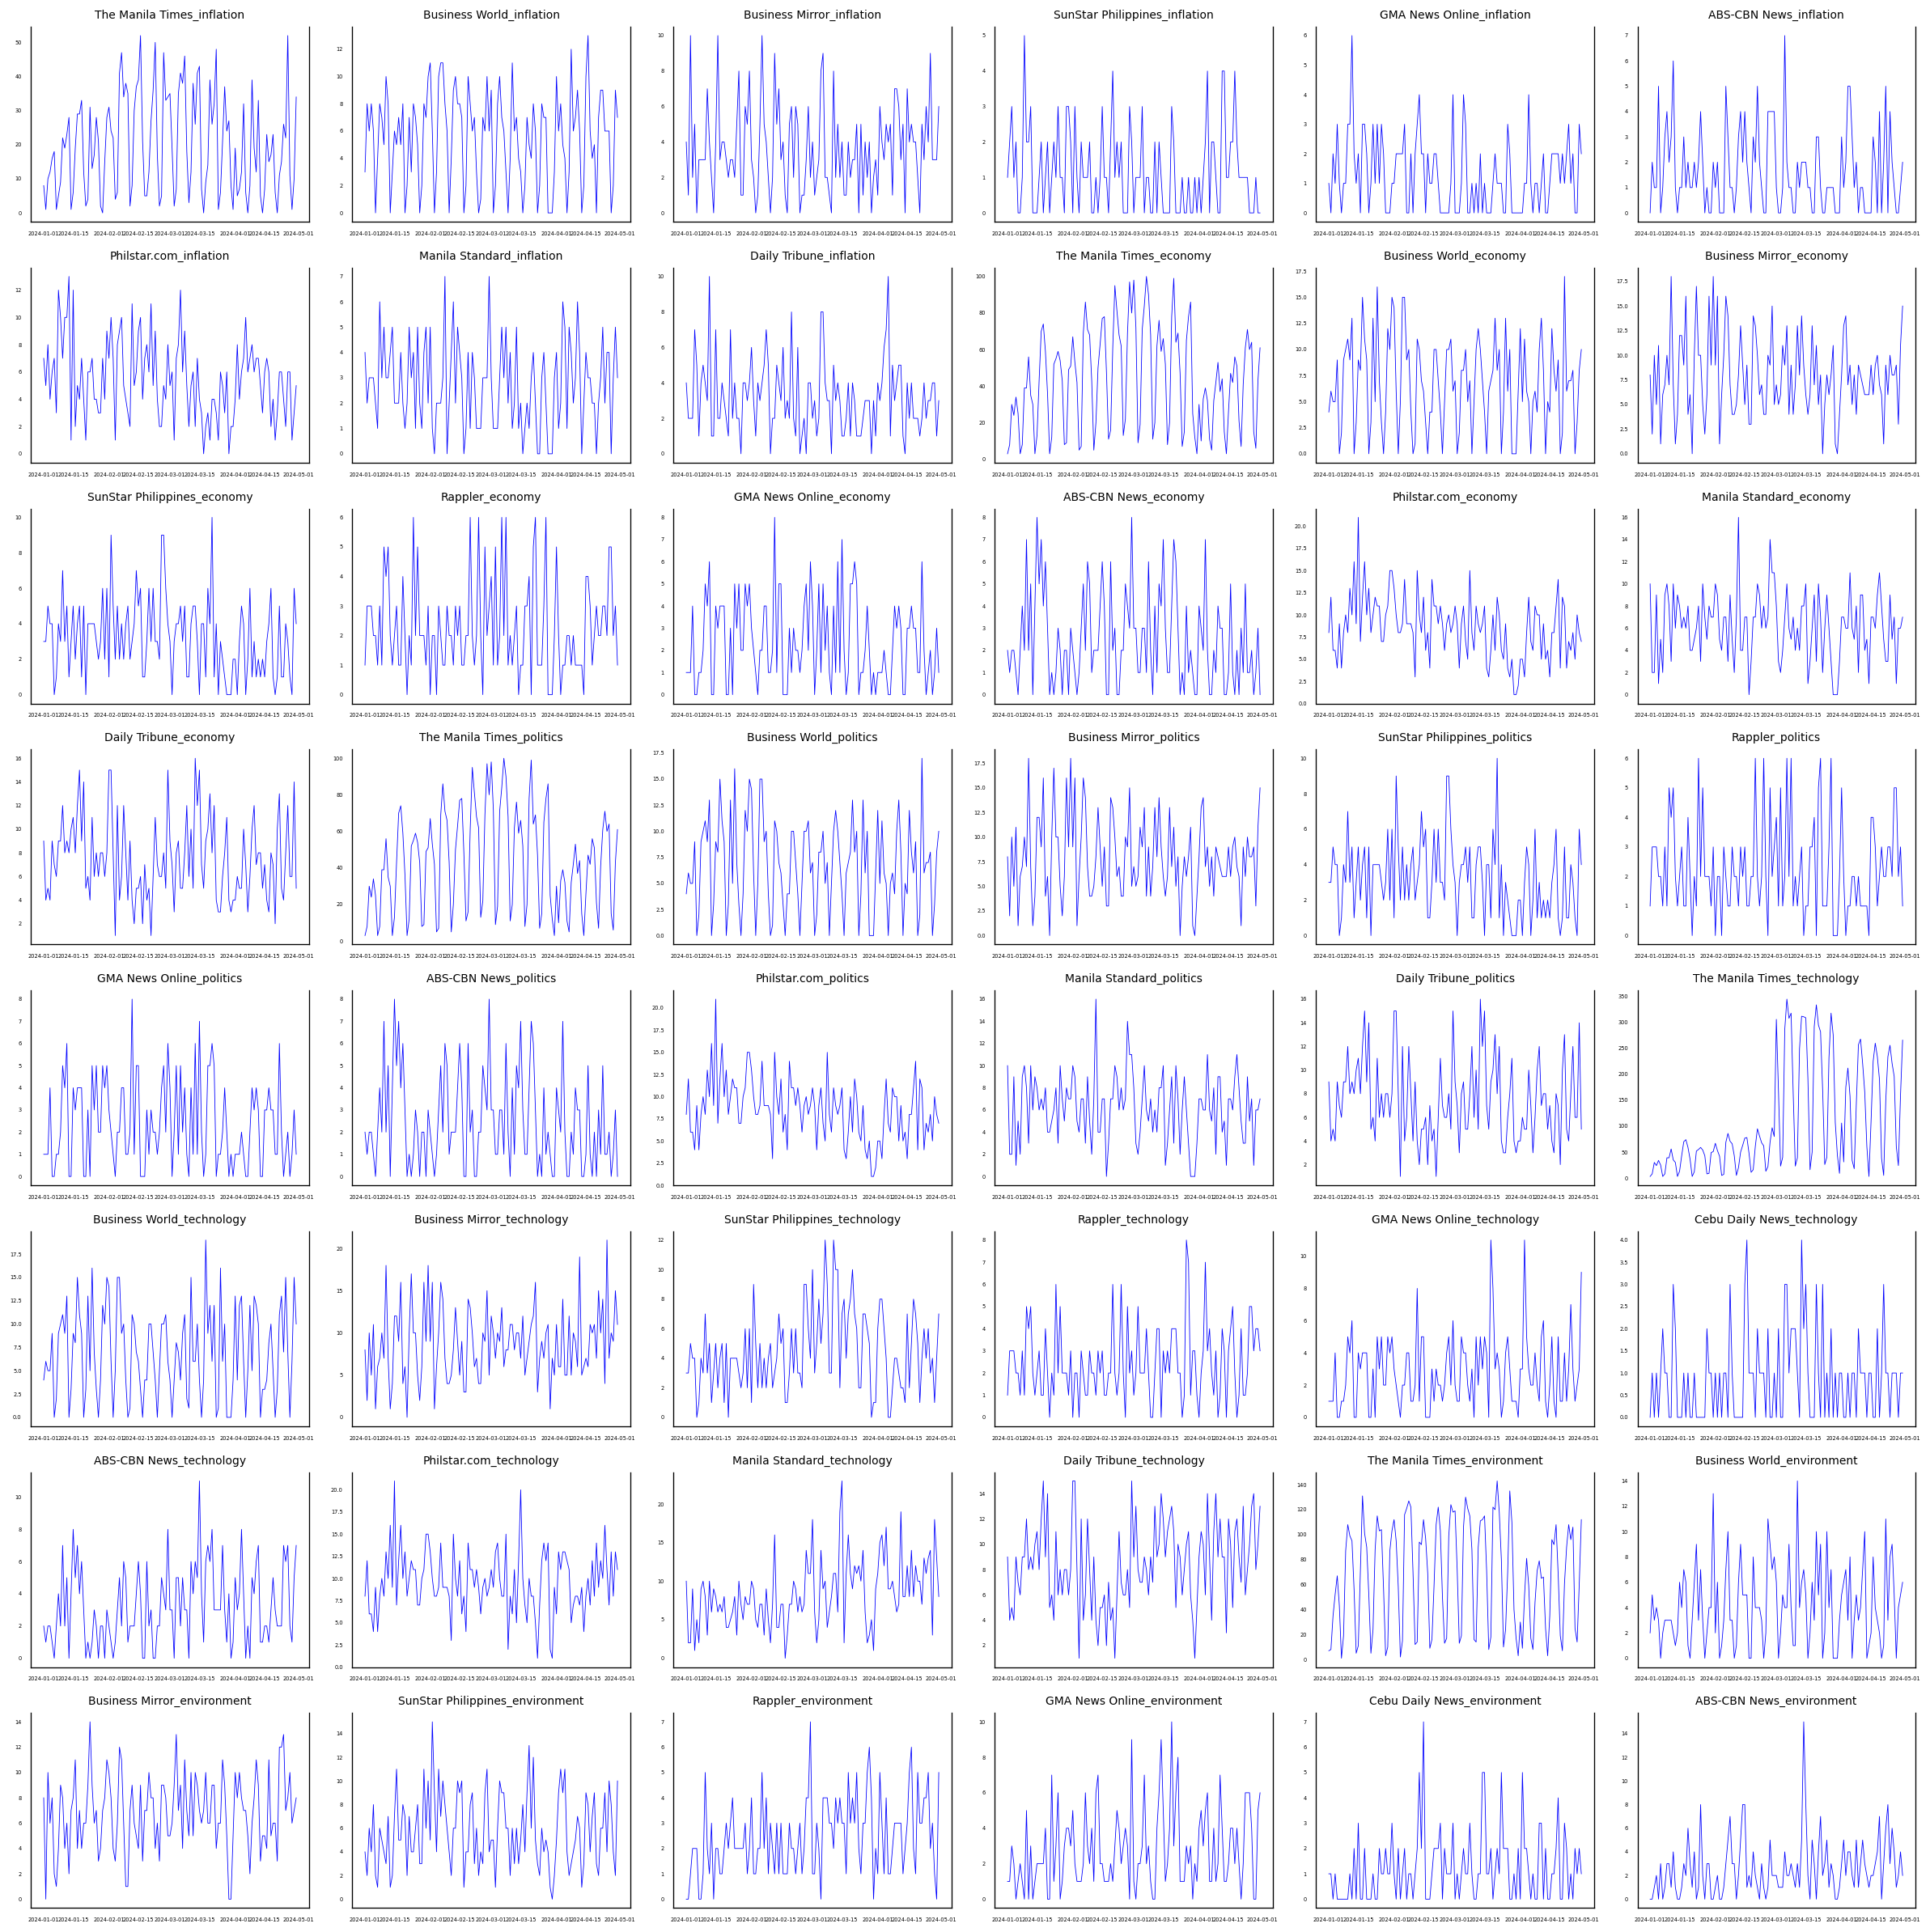

In [ ]:
# Step 10: Visualize the series
fig, axes = plt.subplots(nrows=8, ncols=6, dpi=120, figsize=(20,20))
plt.rcParams.update({'axes.titlesize': 'small'})
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='blue', linewidth=0.5)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=4)

plt.tight_layout();

In [ ]:
correlated_features = []
correlation_matrix = df.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)

print('Number of Correlated Fetaures:')
print(len(correlated_features))
print('Correlated Variables')
print(correlated_features)
df = df.drop(columns=correlated_features)
df = df.loc[:,~df.columns.duplicated()]
print(list(df))

Number of Correlated Fetaures:
31
Correlated Variables
['The Manila Times_economy', 'The Manila Times_politics', 'The Manila Times_politics', 'Business World_politics', 'Business Mirror_politics', 'SunStar Philippines_politics', 'Rappler_politics', 'GMA News Online_politics', 'ABS-CBN News_politics', 'Philstar.com_politics', 'Manila Standard_politics', 'Daily Tribune_politics', 'Business World_technology', 'Business World_technology', 'The Manila Times_environment', 'The Manila Times_environment', 'The Manila Times_environment', 'The Manila Times_health', 'The Manila Times_health', 'The Manila Times_health', 'The Manila Times_health', 'Business World_health', 'Business Mirror_health', 'SunStar Philippines_health', 'Rappler_health', 'GMA News Online_health', 'Cebu Daily News_health', 'ABS-CBN News_health', 'Philstar.com_health', 'Manila Standard_health', 'Daily Tribune_health']
['The Manila Times_inflation', 'Business World_inflation', 'Business Mirror_inflation', 'SunStar Philippines_i

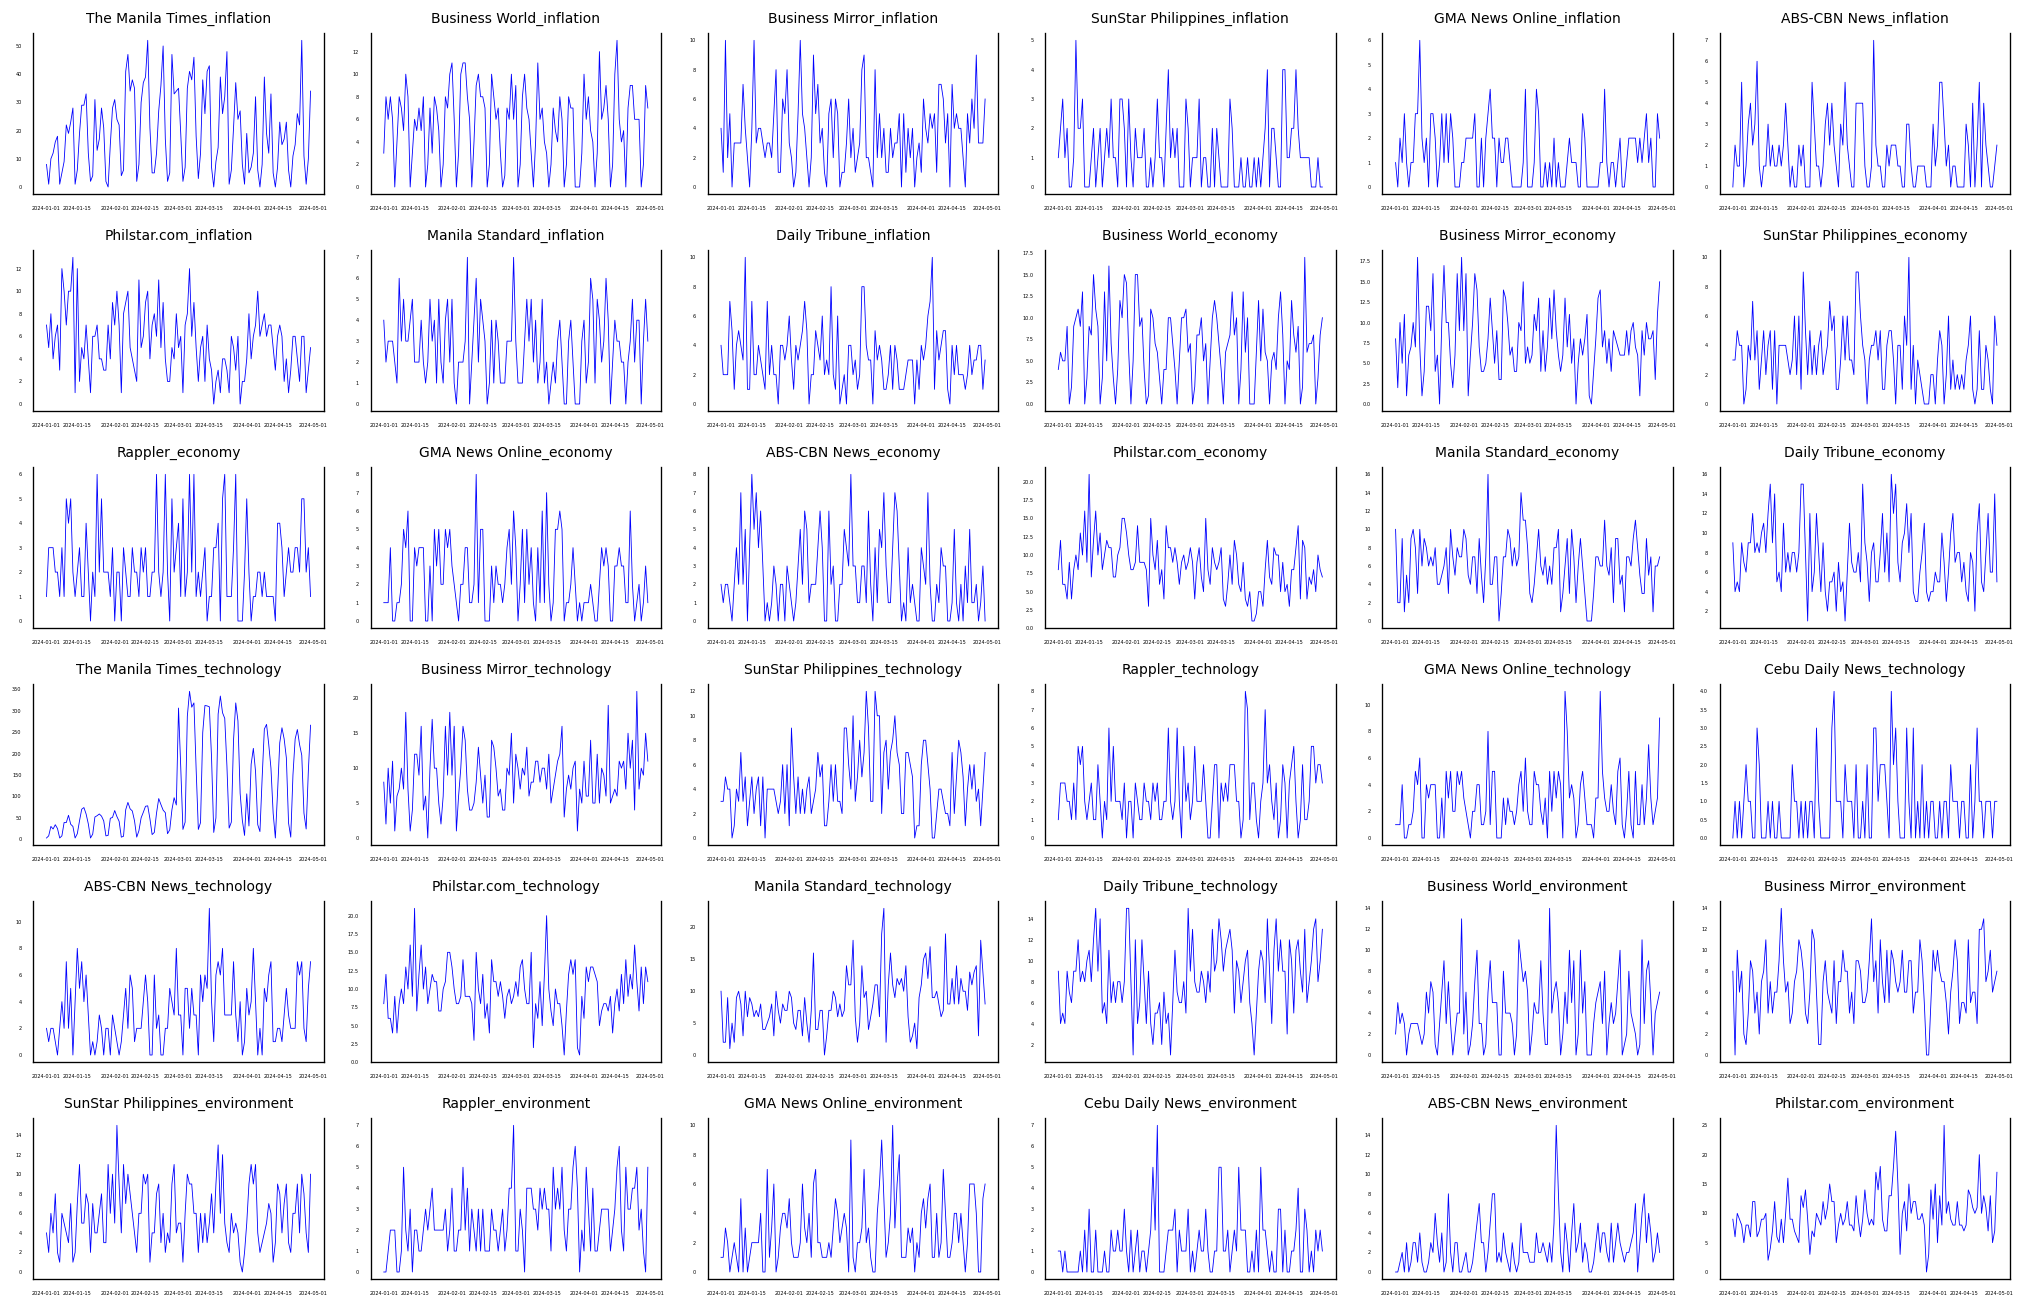

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=6, dpi=120, figsize=(17,11))
plt.rcParams.update({'axes.titlesize': 'small'})
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='blue', linewidth=0.5)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=3)

plt.tight_layout();

In [ ]:
from tabulate import tabulate

def adfuller_test(series, signif=0.05, name='', verbose=False):

    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        status = 'stationary'
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        status = 'non-stationary'
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

    return {'name': name, 'p_value': p_value, 'status': status}



def create_table(data, title):
    if data:
        table = tabulate(data, headers="keys", tablefmt="grid").split('\n')
        table.insert(0, f'{title}:')
        return table
    else:
        return [f'{title}: No data available.']


In [ ]:
#Step 14: Determine if there is none stationary time series
non_stationary_ts = []
stationary_ts = []

for name, column in df.items():
    result = adfuller_test(column, name=column.name)
    if result['status'] == 'stationary':
        stationary_ts.append(result)
    else:
        non_stationary_ts.append(result)
    print('\n')

    Augmented Dickey-Fuller Test on "The Manila Times_inflation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8655
 No. Lags Chosen       = 13
 Critical value 1%     = -3.493
 Critical value 5%     = -2.889
 Critical value 10%    = -2.581
 => P-Value = 0.3485. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Business World_inflation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.9626
 No. Lags Chosen       = 13
 Critical value 1%     = -3.493
 Critical value 5%     = -2.889
 Critical value 10%    = -2.581
 => P-Value = 0.3032. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Business Mirror_inflation" 
    -----------------

In [ ]:
# Create tables for both datasets
print("significant value: 0.5")
print("non-stationary: > 0.5")
print("stationary: < 0.5 \n")

stationary_table = create_table(stationary_ts, "Stationary time series")
non_stationary_table = create_table(non_stationary_ts, "Non-stationary time series")

# Combine the tables side by side
max_len = max(len(stationary_table), len(non_stationary_table))
stationary_table.extend([''] * (max_len - len(stationary_table)))
non_stationary_table.extend([''] * (max_len - len(non_stationary_table)))

combined_table = [f'{st:<60} | {ns}' for st, ns in zip(stationary_table, non_stationary_table)]
print('\n'.join(combined_table))

significant value: 0.5
non-stationary: > 0.5
stationary: < 0.5 

Stationary time series:                                      | Non-stationary time series:
+----------------------------------+-----------+------------+ | +--------------------------------+-----------+----------------+
| name                             |   p_value | status     | | | name                           |   p_value | status         |
+==================================+===========+============+ | +================================+===========+================+
| Business Mirror_inflation        |    0.0119 | stationary | | | The Manila Times_inflation     |    0.3485 | non-stationary |
+----------------------------------+-----------+------------+ | +--------------------------------+-----------+----------------+
| SunStar Philippines_inflation    |    0      | stationary | | | Business World_inflation       |    0.3032 | non-stationary |
+----------------------------------+-----------+------------+ | +-----------

In [ ]:
#Step 15: 1st difference
df_differenced = df.diff().dropna()

In [ ]:
#Step 14: Determine if there is none stationary time series
for name, column in df_differenced.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "The Manila Times_inflation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.7668
 No. Lags Chosen       = 12
 Critical value 1%     = -3.493
 Critical value 5%     = -2.889
 Critical value 10%    = -2.581
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Business World_inflation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.6998
 No. Lags Chosen       = 12
 Critical value 1%     = -3.493
 Critical value 5%     = -2.889
 Critical value 10%    = -2.581
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Business Mirror_inflation" 
    -----------------------------------------------
 Null Hypothe

In [ ]:
print(df_differenced.head())

            The Manila Times_inflation  Business World_inflation  Business Mirror_inflation  SunStar Philippines_inflation  GMA News Online_inflation  ABS-CBN News_inflation  Philstar.com_inflation  Manila Standard_inflation  Daily Tribune_inflation  Business World_economy  Business Mirror_economy  SunStar Philippines_economy  Rappler_economy  GMA News Online_economy  ABS-CBN News_economy  Philstar.com_economy  Manila Standard_economy  Daily Tribune_economy  The Manila Times_technology  Business Mirror_technology  SunStar Philippines_technology  Rappler_technology  GMA News Online_technology  Cebu Daily News_technology  ABS-CBN News_technology  Philstar.com_technology  Manila Standard_technology  Daily Tribune_technology  Business World_environment  Business Mirror_environment  SunStar Philippines_environment  Rappler_environment  GMA News Online_environment  Cebu Daily News_environment  ABS-CBN News_environment  Philstar.com_environment  Manila Standard_environment  Daily Tribune_envi

In [ ]:
cols_drop = []
drop_cols = df_differenced.columns[(df_differenced == 0).sum() > 0.50*df_differenced.shape[1]]
for i in drop_cols:
  cols_drop.append(str(i))
print(cols_drop)
df_differenced = df_differenced.drop(columns = drop_cols, axis = 1)
print(df_differenced)


['SunStar Philippines_inflation', 'GMA News Online_inflation', 'Cebu Daily News_technology', 'InterAksyon_business', 'Cebu Daily News_business', 'Rappler_foreign_affairs', 'ABS-CBN News_foreign_affairs', 'Cebu Daily News_welfare']
            The Manila Times_inflation  Business World_inflation  Business Mirror_inflation  ABS-CBN News_inflation  Philstar.com_inflation  Manila Standard_inflation  Daily Tribune_inflation  Business World_economy  Business Mirror_economy  SunStar Philippines_economy  Rappler_economy  GMA News Online_economy  ABS-CBN News_economy  Philstar.com_economy  Manila Standard_economy  Daily Tribune_economy  The Manila Times_technology  Business Mirror_technology  SunStar Philippines_technology  Rappler_technology  GMA News Online_technology  ABS-CBN News_technology  Philstar.com_technology  Manila Standard_technology  Daily Tribune_technology  Business World_environment  Business Mirror_environment  SunStar Philippines_environment  Rappler_environment  GMA News Onl

In [ ]:
correlated_features = []
correlation_matrix = df_differenced.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)
print('Number of Correlated Features:')
print(len(correlated_features))
print('Correlated Variables')
print(correlated_features)
df_differenced = df_differenced.drop(columns=correlated_features)
df_differenced = df_differenced.loc[:,~df_differenced.columns.duplicated()]
print(list(df_differenced))

Number of Correlated Features:
1
Correlated Variables
['The Manila Times_business']
['The Manila Times_inflation', 'Business World_inflation', 'Business Mirror_inflation', 'ABS-CBN News_inflation', 'Philstar.com_inflation', 'Manila Standard_inflation', 'Daily Tribune_inflation', 'Business World_economy', 'Business Mirror_economy', 'SunStar Philippines_economy', 'Rappler_economy', 'GMA News Online_economy', 'ABS-CBN News_economy', 'Philstar.com_economy', 'Manila Standard_economy', 'Daily Tribune_economy', 'The Manila Times_technology', 'Business Mirror_technology', 'SunStar Philippines_technology', 'Rappler_technology', 'GMA News Online_technology', 'ABS-CBN News_technology', 'Philstar.com_technology', 'Manila Standard_technology', 'Daily Tribune_technology', 'Business World_environment', 'Business Mirror_environment', 'SunStar Philippines_environment', 'Rappler_environment', 'GMA News Online_environment', 'Cebu Daily News_environment', 'ABS-CBN News_environment', 'Philstar.com_environm

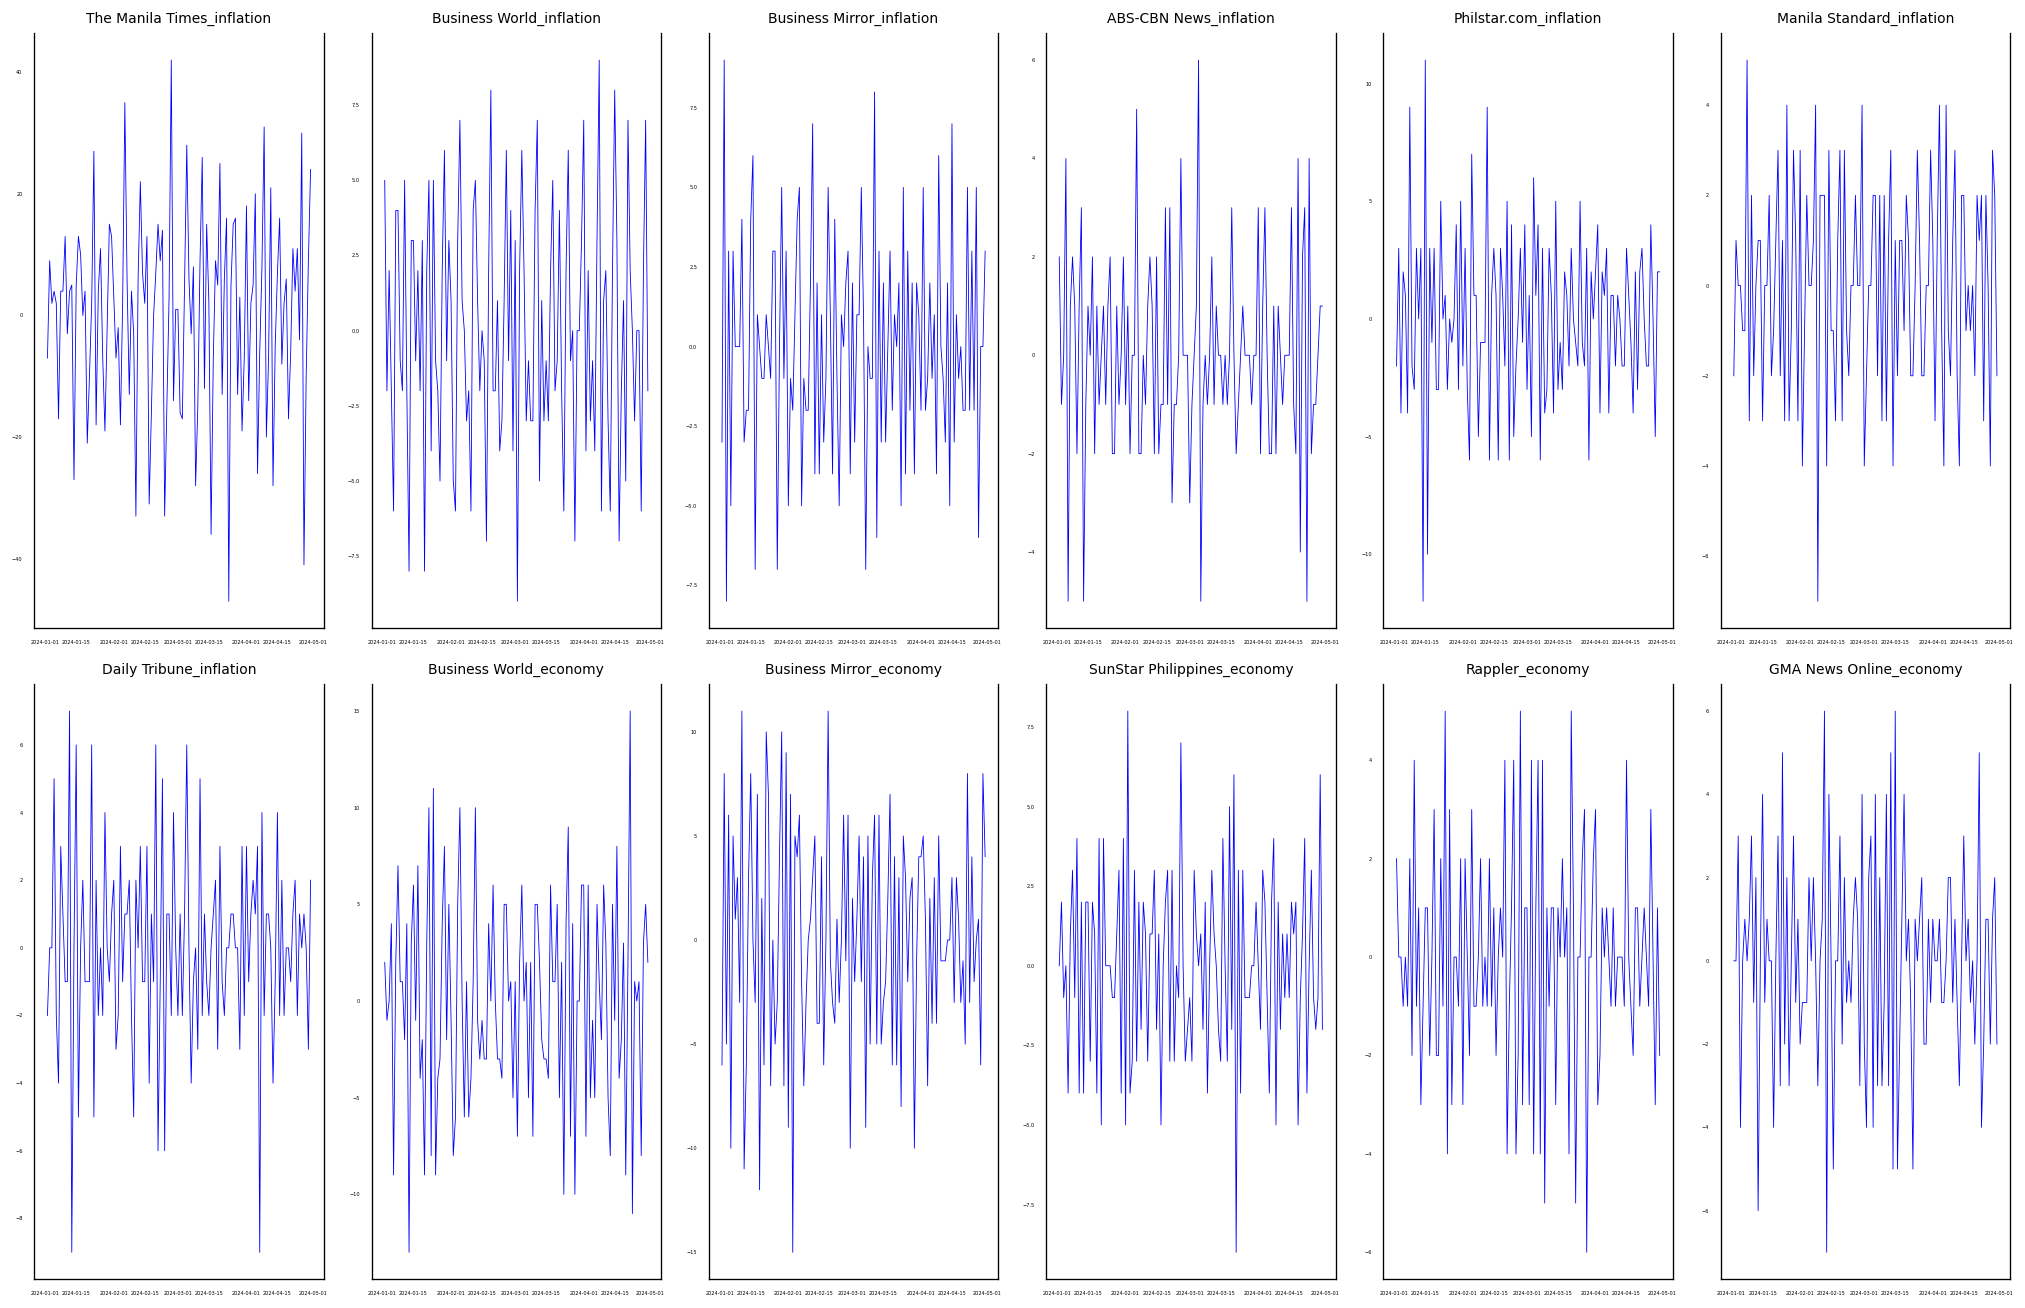

In [ ]:
# Step 12: Visualize the new series

fig, axes = plt.subplots(nrows=2, ncols=6, dpi=120, figsize=(17,11))
plt.rcParams.update({'axes.titlesize': 'small'})
for i, ax in enumerate(axes.flatten()):
    data = df_differenced[df_differenced.columns[i]]
    ax.plot(data, color='blue', linewidth=0.5)
    # Decorations
    ax.set_title(df_differenced.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=3)

plt.tight_layout();

In [ ]:
model = VAR(df_differenced.dropna())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
x = model.select_order(maxlags=1)
x.summary()

# Fit VAR(1) model
var_model = model.fit(maxlags=1, ic='aic')  # Adjust ic to 'bic' or 'hqic' if needed

# Print summary of the model
print(var_model.summary())

ValueError: maxlags is too large for the number of observations and the number of equations. The largest model cannot be estimated.

In [ ]:
#Step 13: Check Granger Causality of all possible combinations of the None-Stationary Time series.
#The rows are the response variable, columns are predictors. The values in the table are the P-Values.

maxlag=1
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

granger_matrix = grangers_causation_matrix(df_differenced, variables=df_differenced.columns)

#Interpretation:
#P-Values lesser than the significance level (0.05), implies the Null Hypothesis that the coefficients of the corresponding past values is zero, that is, the X does not cause Y can be rejected.
#If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).
#For example, P-Value of 0.4930 at (row 1, column 5) represents the p-value of the Grangers Causality test for Law 4_gma_x causing Law 4_abscbn_y,
# but since it is higher than the significance level of 0.05 we cannot reject the null hypothesis and we can say that Law 4_gma_x does not cause Law 4_abscbn_y.
#But the P-Value of 0.0000 at (row 5, column 1) represents the p-value of the Grangers Causality test for causing Law 4_abscbn_x causing Law 4_gma_y,
# since it is lesser than the significance level of 0.05 we reject the null hypothesis and we can say that Law 4_abscbn_x causing Law 4_gma_y.
#Looking at the P-Values in the table, there are some variables that are interchangeably causing each other.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(granger_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title('Granger Causality Test p-values')
plt.xlabel('Predictors (X)')
plt.ylabel('Response Variables (Y)')
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
import numpy as np

# Step 1: Check for stationarity and differencing (Assume this is done with previous code and you have df_differenced)

# Step 2: Test for Cointegration
def johansen_cointegration_test(df, alpha=0.05):
    """Perform Johansen's cointegration test and return results"""
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    traces = result.lr1
    cvts = result.cvt[:, 1]  # Critical values at alpha level
    test_result = traces > cvts
    return test_result, result.evec

# Step 3: Fit VECM
def fit_vecm(df, lags=1, coint_rank=1):
    """Fit the VECM model to the data"""
    vecm = VECM(df, k_ar_diff=lags, coint_rank=coint_rank)
    vecm_fit = vecm.fit()
    return vecm_fit

# Example usage with your DataFrame
# Assuming your differenced DataFrame is named df_differenced

# Convert differenced list to DataFrame if not already done
# df_differenced = pd.concat(df_differenced, axis=1)  # Assuming df_differenced is a list of Series

# Standardize the data
df_differenced = (df_differenced - df_differenced.mean()) / df_differenced.std()

# Perform Johansen cointegration test
cointegration_test_result, cointegration_vectors = johansen_cointegration_test(df_differenced)

# Check if the series are cointegrated
if any(cointegration_test_result):
    print("The series are cointegrated.")
    print("Cointegration vectors:")
    print(cointegration_vectors)

    # Experiment with different values for lags and cointegration rank
    for lags in range(1, 5):  # Trying lag values from 1 to 4
        for coint_rank in range(1, df_differenced.shape[1]):  # Trying different cointegration ranks
            try:
                vecm_model = fit_vecm(df_differenced, lags=lags, coint_rank=coint_rank)
                print(f"VECM Model Summary with lags={lags} and coint_rank={coint_rank}:")
                print(vecm_model.summary())
                break  # Exit the loop if the model fits successfully
            except np.linalg.LinAlgError:
                print(f"Failed to fit VECM with lags={lags} and coint_rank={coint_rank}")
else:
    print("No cointegration relationship found among the series.")


In [ ]:
#Step 14: Test for Cointegration Using Johansen Cointegration Test for None Stationary Time Series
#The Johansen cointegration test helps find any integration relationship in the long-run between variables.
#If there are no cointegrated vectors, then some result in the Granger Causality test maybe a "spurious relationship" then there is a need to apply vector error correction approach.
#If there are cointegrated vectors, then the results in the Granger Causality Test is not Spurious and VAR modeling is applicable.
#Time-series data often appear nonstationary and also tend to comove. A set of nonstationary series that are cointegrated implies existence of a long-run equilibrium relation. If such an equlibrium does not exist, then the apparent comovement is spurious and no meaningful interpretation ensues.
# see https://blog.stata.com/2016/09/06/cointegration-or-spurious-regression/
def cointegration_test(df, alpha=0.05):
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,1)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 1): return str(val).ljust(length)


    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_differenced)

In [ ]:
df